In [5]:
import pandas as pd
df = pd.read_csv(r"C:\Users\USER\Desktop\Data\PHASE3\Phase3-SyriaTel\data\bigml_59c28831336c6604c800002a.csv")

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


# SyriaTel  Customer churn

### INTRODUCTION 

In the current world of business, customer satisfaction has become an integral part for business success. We will be using CRISP-DM methodology in trying to find a solution for our stakeholders at SyriaTel in order to find a solution for customer churning


In the following sections, we will detail the steps involved in developing classification models, from data preparation, to model training, evaluation, and deployment with the goal to provide a comprehensive, actionable solution that empowers Syriatel to reduce churn and sustain its growth in the competitive telecom landscape

The project structure is as follows:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Explaratory Data Analysis
5. Modeling 
6. Model Evaluation
7. Recomendations and Conclusions

### 1. Business Understanding

SyriaTel company is a telecomunication company focused on being one the best in providing quality services to its customers and therefore they need to be competetive and be aware of there customers dynamics and preferences. 

Although such efforts have been fruitful over the years, the company needs to increase its commitment to reducing customer charning rates, which might threaten its market position, profitability, and overall growth. Retaining customers will increase the company's net profits by reducing costs involved in lossing customers.

#### Primary stakeholders

<li> SyriaTel company

#### Other stakeholders

<li>Shareholders
<li>Employees
<li>Customers

The project aims to provide value to the different stakeholders by identifying predictable patterns related to customer churn, which can help SyriaTel take proactive measures to retain customers and minimize revenue loss


##### Research questions to ask


<li> What is the main reason customers leave?
<li> What retention strategies are currently in place?
<li> What is the financial impact of customer churn?

#### Research Objectives


Here are some of the research objectives:
   <li> Impove customer services
   <li> identify key Drivers of churn
   <li> Reduce the costs associated with acquiring new customers by focusing on retaining existing ones

### 2. Data Understanding

In [15]:
# let us import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [9]:
# reading the data 
df = pd.read_csv(r"C:\Users\USER\Desktop\Data\PHASE3\Phase3-SyriaTel\data\bigml_59c28831336c6604c800002a.csv")

# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Our data has 21 features and 3333 records.
Here is the breakdown of our Features and what they entail:
<br>
   <li>State: The state the customer lives in
   <li>Account Length: The number of days the customer has had an account.
   <li>Area Code: The area code of the customer
   <li>Phone Number: The phone number of the customer
   <li>International Plan: True if the customer has the international plan, otherwise false
   <li>Voice Mail Plan: True if the customer has the voice mail plan, otherwise false.
   <li>Number Vmail Messages: the number of voicemails the customer has sent.
   <li>Total Day Minutes: total number of minutes the customer has been in calls during the day
   <li>Total Day Calls: total number of calls the user has done during the day
   <li>Total Day Charge: total amount of money the customer was charged by the Telecom company for calls during the day
   <li>Total Eve Minutes: total number of minutes the customer has been in calls during the evening
   <li>Total Eve Calls: total number of calls the customer has done during the evening.
   <li>Total Eve Charge: total amount of money the customer was charged by the Telecom company for calls during the evening.
   <li>Total Night Minutes: total number of minutes the customer has been in calls during the night
   <li>Total Night Calls: total number of calls the customer has done during the night.
   <li>Total Night Charge: total amount of money the customer was charged by the Telecom company for calls during the night.
   <li>Total Intl Minutes: total number of minutes the user has been in international calls.
   <li>Total Intl Calls: total number of international calls the customer has done.
   <li>Total Intl Charge: total amount of money the customer was charged by the Telecom company for international calls
   <li>Customer Service Calls: number of calls the customer has made to customer service.
   <li>Churn: true if the customer terminated their contract, otherwise false

The data has a mix of different data types as well mainly:
   <li> Object
   <li> Integers
   <li> Floats
   <li> Booleans

#### 3. Data Preparation

Under data preparation we will look at the null values, shape of our data, missing values, duplicates and outliers and there treatment

In [10]:
# chacking shape
df.shape

(3333, 21)

In [11]:
# checking for percentage of missing values
def missing(data):
    ### this functions returns missing value percentage ###
    return ((data.isnull().sum().sum())/data.shape[0]) * 100

missing(df)

0.0

Great, We do have any missing values in our dataset.
Let us now check for duplicate values as well


In [13]:
def duplicates(data):
    ### This functions checks for duplicate in our dataset
    return data.duplicated().sum()

duplicates(df)


0

Now let us check for outliers in our dataset

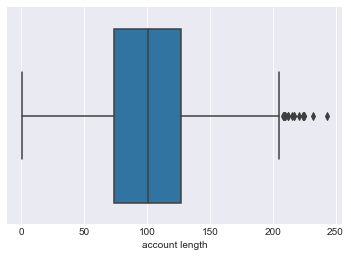

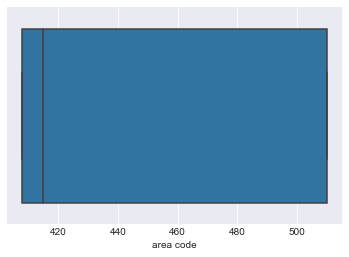

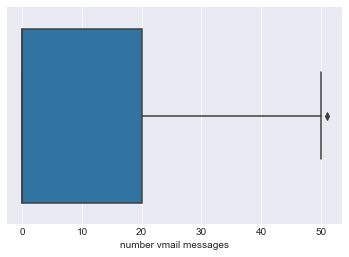

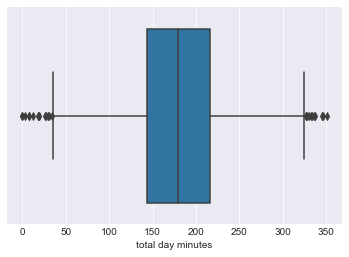

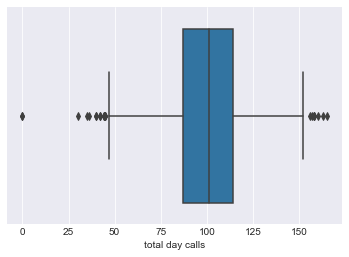

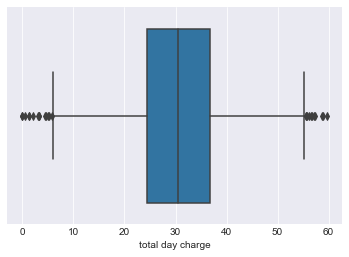

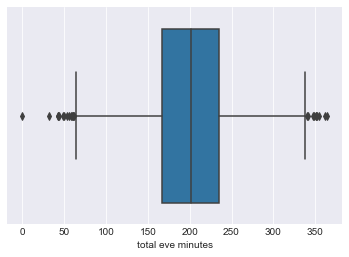

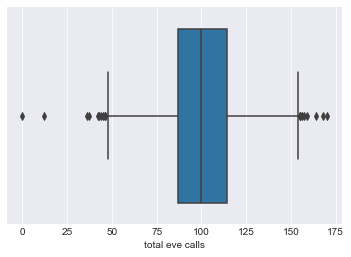

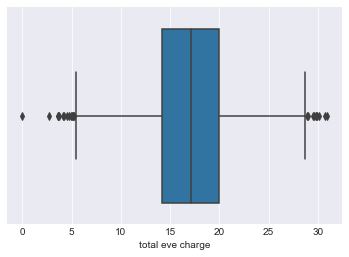

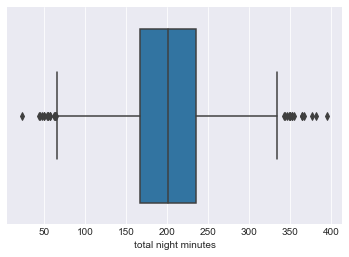

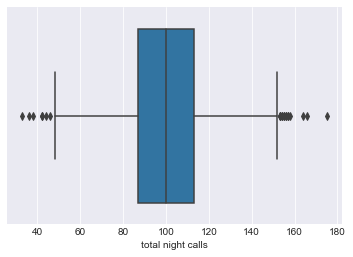

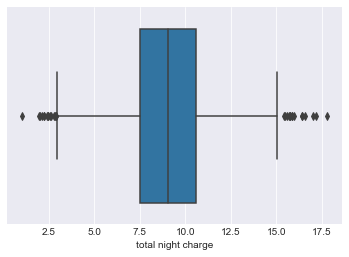

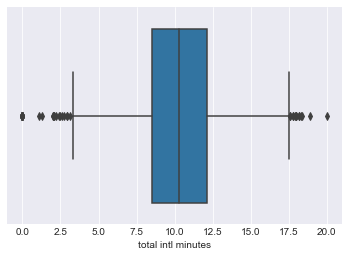

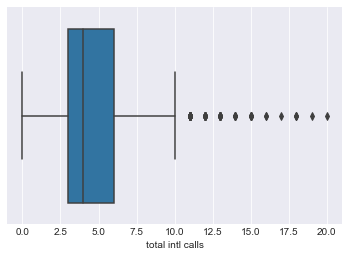

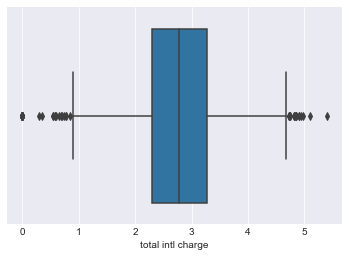

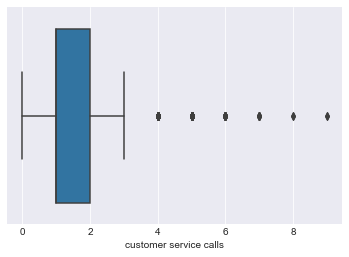

In [20]:
def outliers(data):
    ### this function checks for outliers in our entire dataset
    for i in data.select_dtypes(include='number').columns:
        sns.boxplot(data=data, x=data[i])
        plt.show()

outliers(df)


Our data has outliers on several features including customer service call, total intl charge, total intl call,total intl minutes, total night charge, total night charge, total night calls, total night minutes, total evenning charge, total evening minutes, total evening and others as displayed above.

Before we start the outlier treatment we need to look at the distribution of the dataset as well to see if our data is skewed

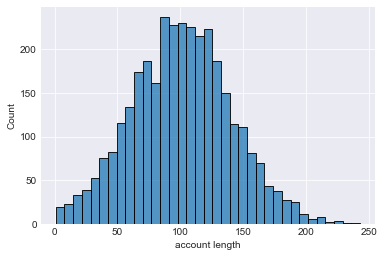

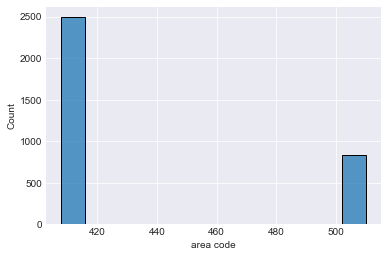

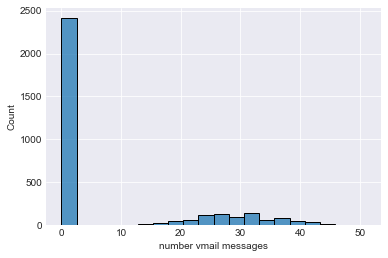

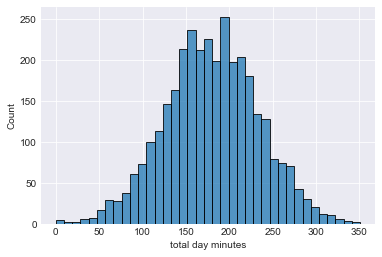

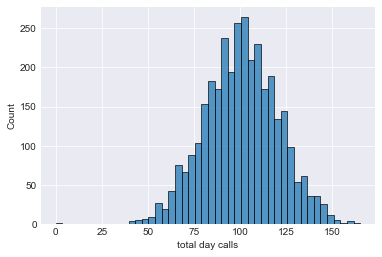

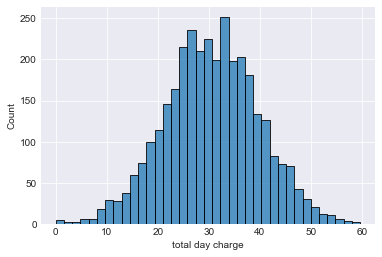

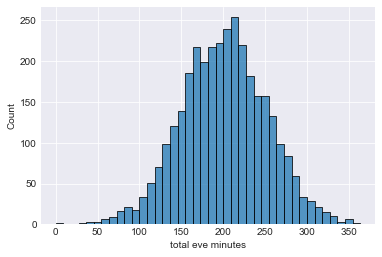

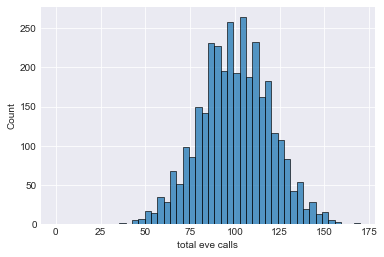

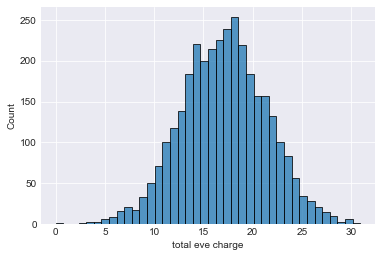

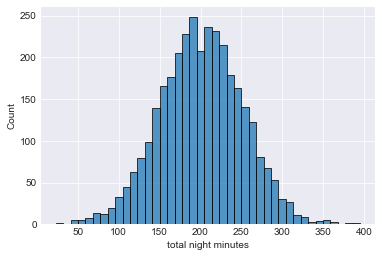

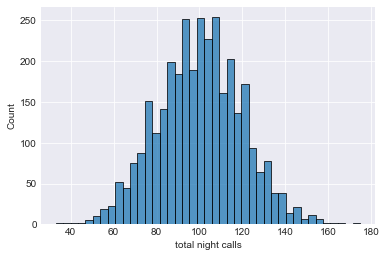

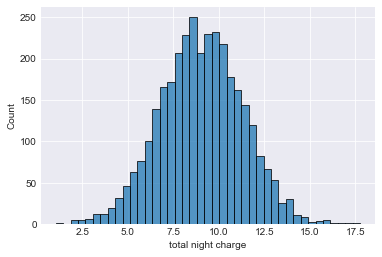

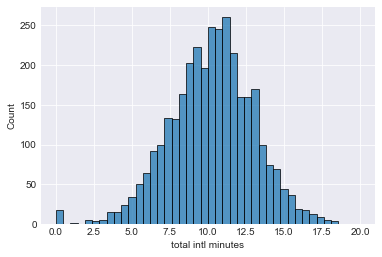

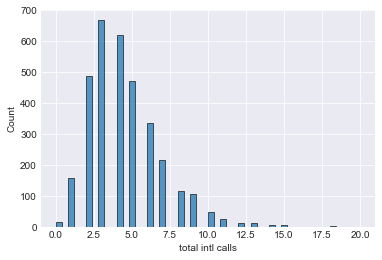

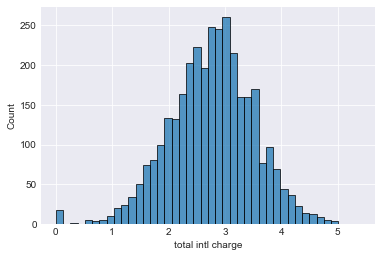

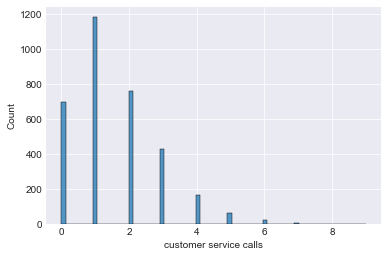

In [21]:
# checking at the distribution of our data 
def distribution(data):
    ### this function checks for distribution of our dataset that are numerical
    for i in data.select_dtypes(include='number').columns:
        sns.histplot(data=data, x=data[i])
        plt.show()

# 
distribution(df)